In [221]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv


In [222]:
%matplotlib inline

In [223]:
df = pd.read_csv("/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv")
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


## Exploring the dataset

In [224]:
df.shape

(2900, 8)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [226]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [227]:
numeric_cols = df.select_dtypes(include = ["float64"]).columns
numeric_cols

Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency'],
      dtype='object')

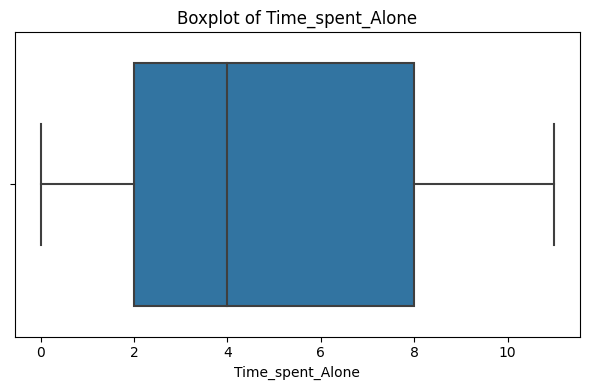

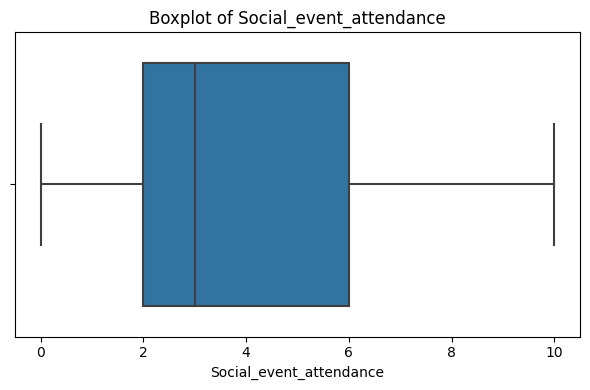

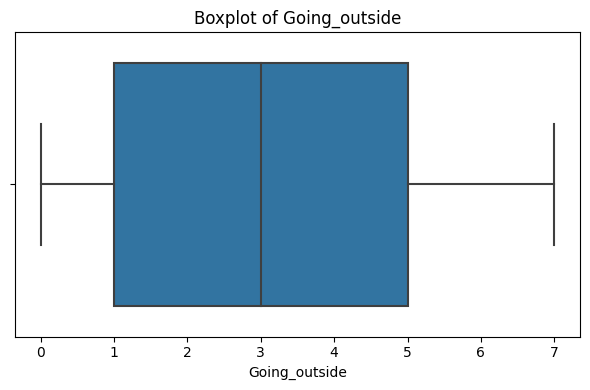

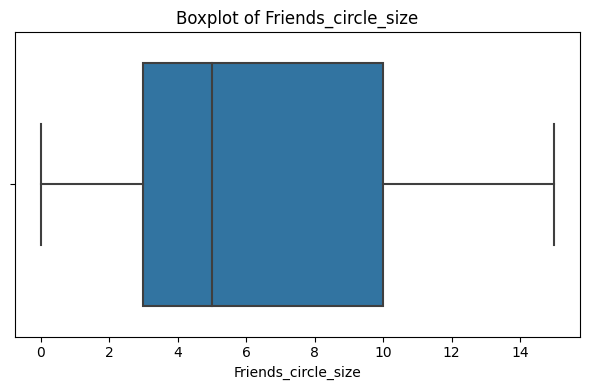

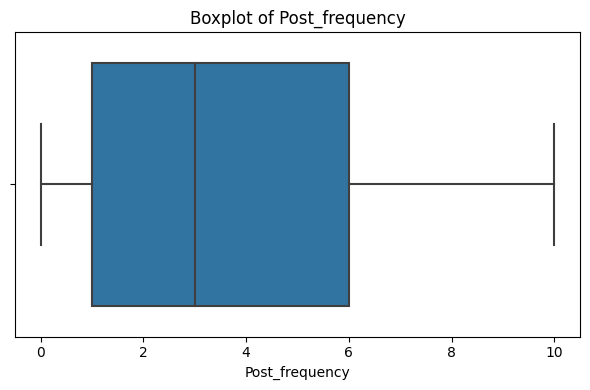

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(6, 4))  # optional: sets consistent size
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


## Preprocessing the dataset
### Cleaning the null values

In [229]:
df.isna().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [230]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [231]:
df.isna().sum()

Time_spent_Alone              0
Stage_fear                   73
Social_event_attendance       0
Going_outside                 0
Drained_after_socializing    52
Friends_circle_size           0
Post_frequency                0
Personality                   0
dtype: int64

In [232]:
df["Stage_fear"] = df['Stage_fear'].fillna(df["Stage_fear"].mode()[0])

In [233]:
df["Drained_after_socializing"] = df['Drained_after_socializing'].fillna(df["Drained_after_socializing"].mode()[0])

In [234]:
df.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

## Now the missing values has been treated, now let's convert object data into numeric for this I am using the map function

In [235]:
X = df.drop("Personality", axis = 1)
y = df['Personality']

In [236]:
X["Drained_after_socializing"].unique()

array(['No', 'Yes'], dtype=object)

In [237]:
X['Drained_after_socializing'] = X['Drained_after_socializing'].map({"Yes" : 1, "No" : 0})

In [238]:
X['Stage_fear'] = X['Stage_fear'].map({"Yes" : 1, "No" : 0})

In [239]:
X.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,4.0,0,4.0,6.0,0,13.0,5.0
1,9.0,1,0.0,0.0,1,0.0,3.0
2,9.0,1,1.0,2.0,1,5.0,2.0
3,0.0,0,6.0,7.0,0,14.0,8.0
4,3.0,0,9.0,4.0,0,8.0,5.0


In [240]:
y.unique()

array(['Extrovert', 'Introvert'], dtype=object)

In [241]:
y = y.map({"Extrovert" : 1, "Introvert" : 0})

## EDA

<Axes: >

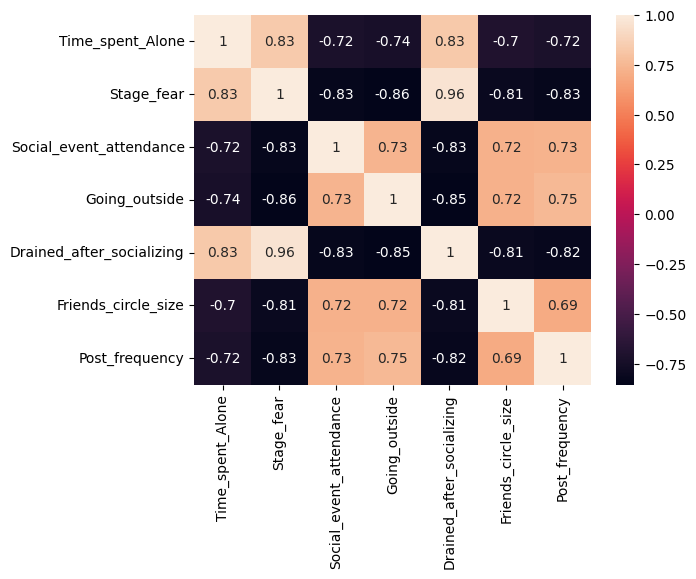

In [242]:
sns.heatmap(X.corr(), annot = True)

In [243]:
def multicolinear(dataset, threshold):
    col_set = set()
    col_matrix = dataset.corr()
    for i in range(len(col_matrix.columns)):
        for j in range(i):
            if col_matrix.iloc[i,j] > threshold:
                colname = col_matrix.columns[i]
                col_set.add(colname)
    return col_set

In [244]:
multicolinear(X, .80)

{'Drained_after_socializing', 'Stage_fear'}

## The following columns 'Drained_after_socializing', 'Stage_fear' has correlation of more the 0.80. If needed during the tuning we can remove one of them.

## Feature scaling

In [245]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [246]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Creation

In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


In [248]:
models = {
    "LogisticRegression":LogisticRegression(),
    "SVM" : SVC(), 
    "DecisionTree" : DecisionTreeClassifier(), 
    "RandomForest" : RandomForestClassifier(), 
    "Adaboost" : AdaBoostClassifier(), 
    "GradientBoost" : GradientBoostingClassifier(), 
    "XGBoost" : XGBClassifier()
}

In [249]:
from sklearn.metrics import accuracy_score, classification_report

In [250]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print()
    print(f"{list(models.keys())[i]}, training_score : {accuracy_score(y_pred_train, y_train) * 100}")
    print(f"{list(models.keys())[i]}, testing_score : {accuracy_score(y_pred_test, y_test) * 100}")


LogisticRegression, training_score : 92.75862068965517
LogisticRegression, testing_score : 91.95402298850574

SVM, training_score : 93.79310344827586
SVM, testing_score : 92.64367816091954

DecisionTree, training_score : 98.66995073891626
DecisionTree, testing_score : 85.0574712643678

RandomForest, training_score : 98.66995073891626
RandomForest, testing_score : 90.91954022988506

Adaboost, training_score : 93.05418719211823
Adaboost, testing_score : 91.83908045977012

GradientBoost, training_score : 93.99014778325123
GradientBoost, testing_score : 92.52873563218391

XGBoost, training_score : 96.55172413793103
XGBoost, testing_score : 91.49425287356323


## Every model preforms best now how can I choose the final model for production?
### Answer: Check the highest testing accuracy(for this problem sttement lets take top - 4) then check the diference of training and testing accuracy. 
### Thus SVM preforms best. 

## Hyperparameter tunning

In [270]:
svm_params = {
    "C" : [0.1, 0.01, 1, 10, 100],
    "kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
    "gamma" : ['scale', 'auto'],
}

model_list = [("SVM", SVC(), svm_params)]
model_list

[('SVM',
  SVC(),
  {'C': [0.1, 0.01, 1, 10, 100],
   'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
   'gamma': ['scale', 'auto']})]

In [271]:
from sklearn.model_selection import RandomizedSearchCV

In [272]:
for name, model, param in model_list:
    tuner = RandomizedSearchCV(estimator = model, param_distributions = param, scoring = "r2", cv = 5)
    tuner.fit(X_train, y_train)

In [274]:
tuner.best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'C': 0.01}

In [278]:
model = SVC(kernel = 'rbf', gamma = 'scale', C = 0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

##getting accuracy
print("score : ", accuracy_score(y_test, y_pred)*100)

score :  92.64367816091954


## Conclusion : Final accuracy 92.64%